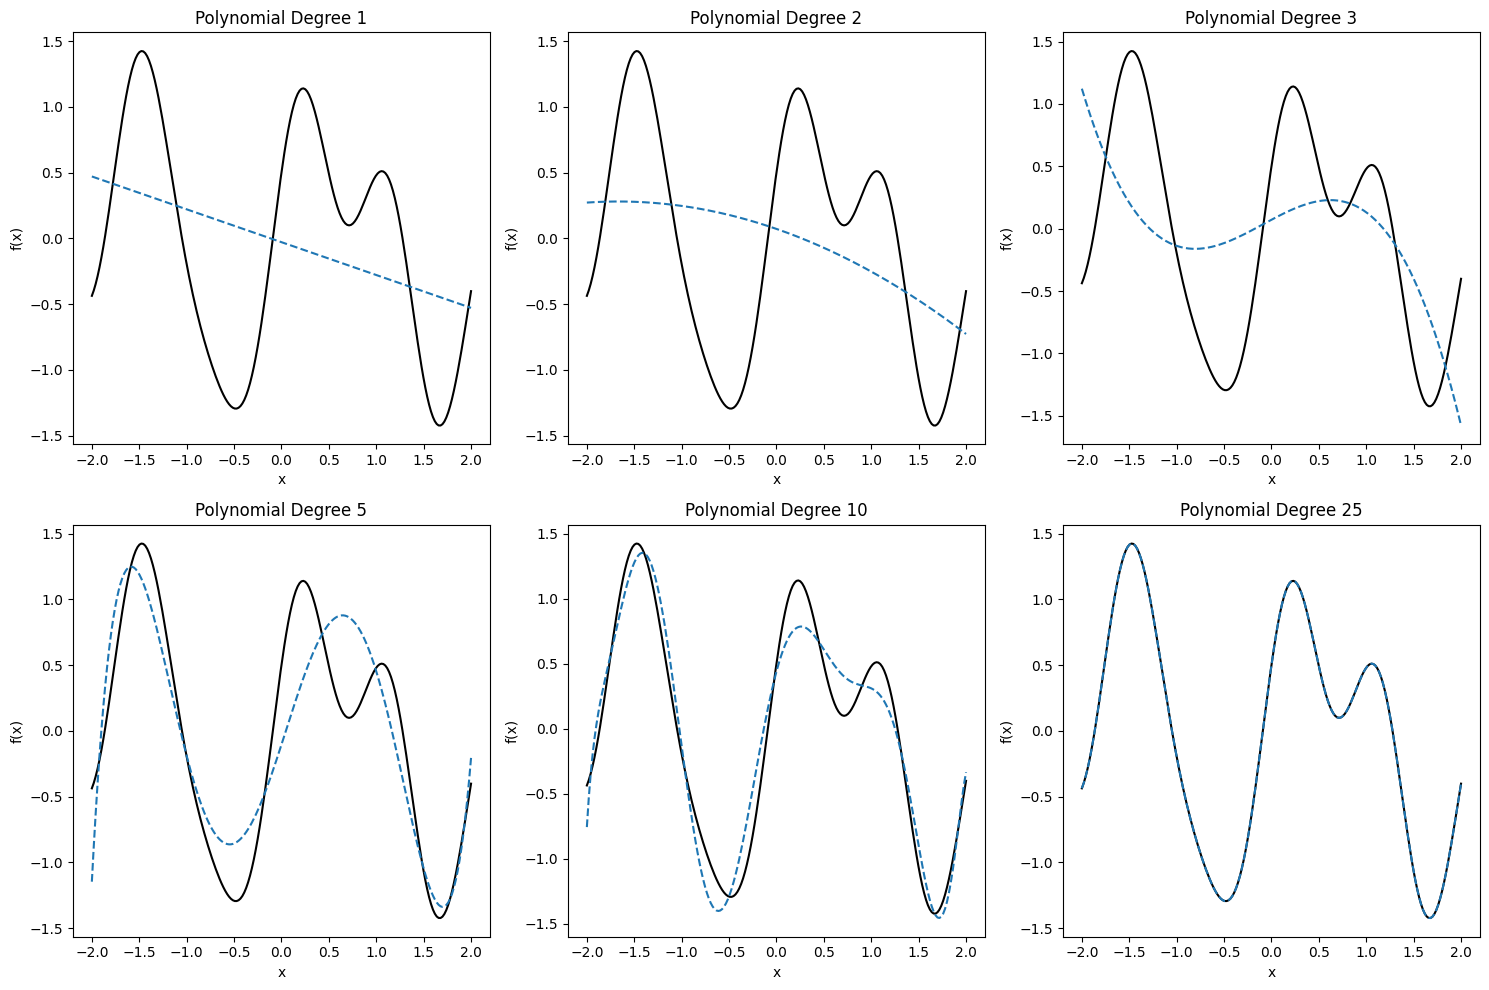

In [22]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import Polynomial
# 1. Generate data from a complex nonlinear function
def complex_function(x):
    return np.sin(3 * x) + 0.5 * np.cos(5 * x) + 0.3 * np.sin(7 * x)
    return np.sin(3*x)

x = np.linspace(-2, 2, 200)
y_true = complex_function(x)

# Plot polynomial basis expansion for different degrees
degrees = [1, 2, 3, 5, 10, 25]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(x.reshape(-1, 1))
    model_poly = LinearRegression().fit(X=X_poly, y=y_true)
    y_poly_pred = model_poly.predict(X_poly)
    
    axes[i].plot(x, y_true, label="True function", color='black')
    axes[i].plot(x, y_poly_pred, label=f"Degree {degree}", linestyle='--')
    axes[i].set_title(f"Polynomial Degree {degree}")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("f(x)")
    

plt.tight_layout()
plt.show()


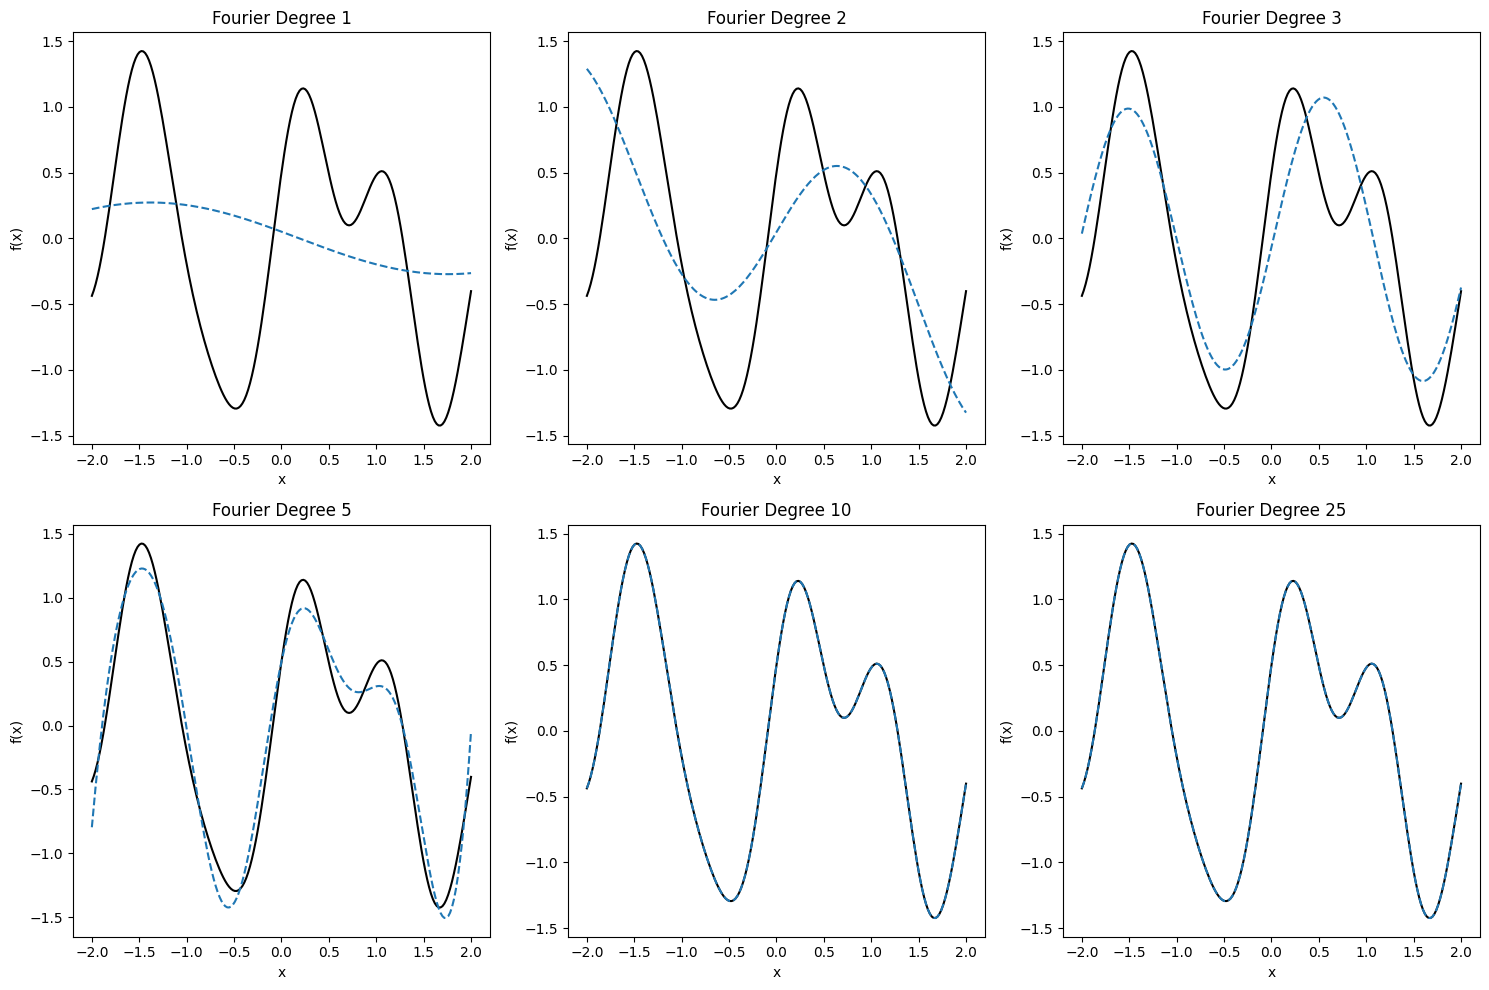

In [25]:
from scipy.optimize import curve_fit

def complex_function(x):
    return np.sin(3 * x) + 0.5 * np.cos(5 * x) + 0.3 * np.sin(7 * x)
    return np.sin(3*x)

x = np.linspace(-2, 2, 200)
y_true = complex_function(x)


# Define the Fourier series function
def fourier_series(x, *coeffs):
    result = np.zeros_like(x)
    n = len(coeffs) // 2
    for i in range(n):
        result += coeffs[2 * i] * np.cos((i + 1) * x) + coeffs[2 * i + 1] * np.sin((i + 1) * x)
    return result

degrees = [1, 2, 3, 5, 10, 25]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, degree in enumerate(degrees):
    initial_guess = np.random.randn(2 * degree)
    coeffs_opt, _ = curve_fit(lambda x, *c: fourier_series(x, *c), x, y_true, p0=initial_guess)
    y_fourier = fourier_series(x, *coeffs_opt)
    
    axes[i].plot(x, y_true, label="True function", color='black')
    axes[i].plot(x, y_fourier, label=f"Fourier Approximation (N={degree})", linestyle='--')
    axes[i].set_title(f"Fourier Degree {degree}")
    axes[i].set_xlabel("x")
    axes[i].set_ylabel("f(x)")


plt.tight_layout()
plt.show()
